# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [33]:
import numpy as np
import matplotlib.pyplot as plt 

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import my_inauguralproject
import HouseholdSpecializationModel as model


# Initialize class
hsm = model.HouseholdSpecializationModelClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

In [34]:
#We import the model above. For a start we get the solution. 

#Based on consumer problem in lecture 6. We are looping over the answers
def print_table():
    
    # a. empty text
    text = ''
    
    text += f'{"Alpha/Sigma":<7s}{"":1s}'

    # b. top header
    for sigma in np.linspace(0.5,1.5,3):
       hsm.par.sigma=sigma
       text += f'{sigma:8.2f}' 
    text += '\n' + '-'*40 + '\n' # separator
    
    # c. body
    for i,alpha in enumerate(np.linspace(0.25,0.75,3)):
        hsm.par.alpha=alpha
        if i > 0: #tilføjer det her for at skippe det første linjeskift, ellers så kommer der en tom linje som den første række i tabellen.
            text += '\n'
        text += f'{alpha:10.2f} |'
        for sigma in np.linspace(0.5,1.5,3): 
            hsm.par.sigma=sigma
            dsol = hsm.solve_discrete()
            text += f'{dsol.HF_HM:8.2f}'  #laver dobbelt forloop fordi vi skal bruge værdier fra både x1_vec og x2_vec;

    #d. reset values of alpha and sigma:
    
    hsm.par.alpha = 0.5
    hsm.par.sigma = 1.0
    
    # d. print
    print(f"Table of HF/HM values:\n{text}")

print_table()

c:\Users\Bruger\IntroProg\My-repository\Assignments (own try)\inauguralproject\HouseholdSpecializationModel.py:63: RuntimeWarning: divide by zero encountered in reciprocal
  H= ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+
c:\Users\Bruger\IntroProg\My-repository\Assignments (own try)\inauguralproject\HouseholdSpecializationModel.py:64: RuntimeWarning: divide by zero encountered in reciprocal
  par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


Table of HF/HM values:
Alpha/Sigma     0.50    1.00    1.50
----------------------------------------
      0.25 |    0.55    0.31    0.21
      0.50 |    1.00    1.00    1.00
      0.75 |    1.83    3.25    4.67


# Question 2

Explain your code and procedure

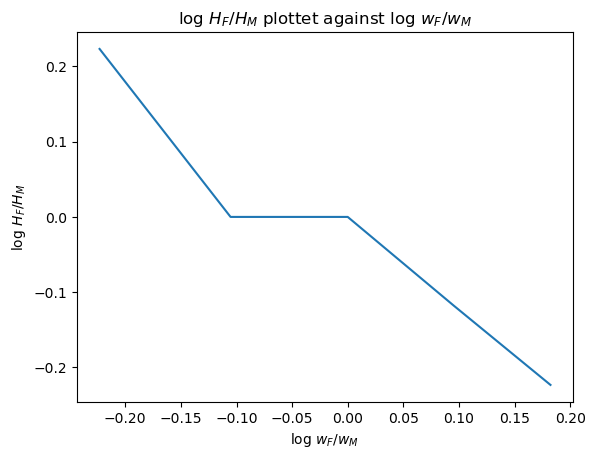

In [35]:
# a. create the figure
fig = plt.figure() 
#first we create a figure object by initializing the plt.figure

# b. plot
ax = fig.add_subplot(1,1,1) 
#we only add one subplot so the ax is basically the entire figure.

ax.plot(np.log(hsm.par.wF_vec),hsm.solve_wF_vec(discrete=True)) 
#x-axis: we plot log(wF_vec), since wM is fixed at 1, 
#so it is already taken into account in this vector.
#Note: we only take the log here, so we don't need to store the log values
#y-axis: we call the solve_wF_vec method from our class directly,
#so we again don't need to store the values.

ax.set_title('log $H_F/H_M$ plottet against log $w_F/w_M$') #set title
ax.set_xlabel('log $w_F/w_M$') #set label for x-axis
ax.set_ylabel('log $H_F/H_M$'); #set label for y-axis

# Question 3

Explain your code and procedure

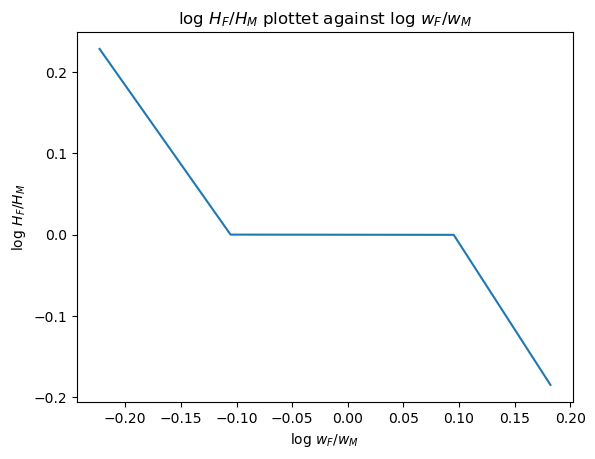

In [36]:
# a. create the figure
fig = plt.figure() 
#first we create a figure object by initializing the plt.figure

# b. plot
ax = fig.add_subplot(1,1,1) 
#we only add one subplot so the ax is basically the entire figure.

ax.plot(np.log(hsm.par.wF_vec),hsm.solve_wF_vec(discrete=False)) 
#x-axis: we plot log(wF_vec), since wM is fixed at 1, 
#so it is already taken into account in this vector.
#Note: we only take the log here, so we don't need to store the log values
#y-axis: we call the solve_wF_vec method from our class directly,
#so we again don't need to store the values.
#Note: now we call discrete = False, because we want it to use the
#continous solving method.

ax.set_title('log $H_F/H_M$ plottet against log $w_F/w_M$') #set title
ax.set_xlabel('log $w_F/w_M$') #set label for x-axis
ax.set_ylabel('log $H_F/H_M$'); #set label for y-axis

# Question 4

In [37]:
log_HF_HM_best=np.zeros(hsm.par.wF_vec.size)
target_best=10**6
alpha_best=0
sigma_best=0
for i, alpha in enumerate(np.linspace(0.0,1.0,20)):
    hsm.par.alpha=alpha
    for j, sigma in enumerate(np.linspace(0.0,1.5,40)): 
        hsm.par.sigma=sigma
        hsm.run_regression()
        target_new=(hsm.par.beta0_target-hsm.opt.beta0)**2+(hsm.par.beta1_target-hsm.opt.beta1)**2
        if target_new<target_best:
            target_best=target_new
            alpha_best=alpha
            sigma_best=sigma
            log_HF_HM_best=hsm.solve_wF_vec(discrete=False)
            
        else: 
            target_best=target_best
            alpha_best=alpha_best
            sigma_best=sigma_best
            log_HF_HM_best=log_HF_HM_best
#Returning values
hsm.par.alpha=0.5
hsm.par.sigma=1.0
hsm.par.wF=1.0

c:\Users\Bruger\IntroProg\My-repository\Assignments (own try)\inauguralproject\HouseholdSpecializationModel.py:64: RuntimeWarning: divide by zero encountered in double_scalars
  par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
c:\Users\Bruger\IntroProg\My-repository\Assignments (own try)\inauguralproject\HouseholdSpecializationModel.py:64: RuntimeWarning: invalid value encountered in double_scalars
  par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
c:\Users\Bruger\IntroProg\My-repository\Assignments (own try)\inauguralproject\HouseholdSpecializationModel.py:64: RuntimeWarning: overflow encountered in double_scalars
  par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
c:\Users\Bruger\IntroProg\My-repository\Assignments (own try)\inauguralproject\HouseholdSpecializationModel.py:169: RuntimeWarning: divide by zero encountered in log
  log_HF_HM[i] = np.log(opt.HF_HM)
c:\Users\Bruger\IntroProg\My-repository\Assignments (own try)\inaugu

In [38]:
print(f'Optimal value of alpha = {alpha_best:.2f}')
print(f'Optimal value of sigma = {sigma_best:.2f}')
print(f'Value of target function = {target_best:.2f}')
log_HF_HM_best


Optimal value of alpha = 0.95
Optimal value of sigma = 0.12
Value of target function = 0.01


array([0.35640297, 0.34407943, 0.31438753, 0.31456738, 0.31381673])

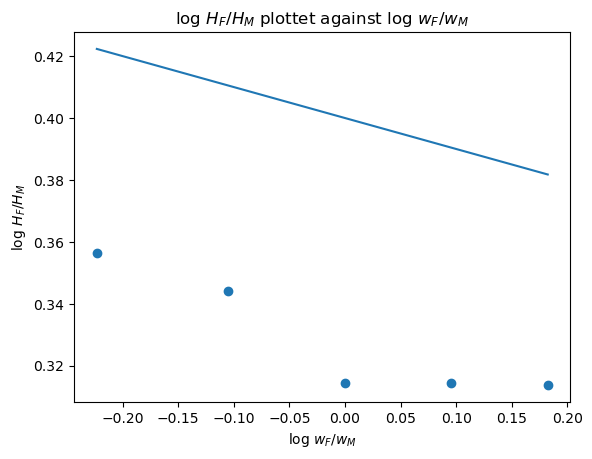

In [39]:
# a. create the figure
fig = plt.figure() 
#first we create a figure object by initializing the plt.figure

# b. plot
ax = fig.add_subplot(1,1,1) 
#we only add one subplot so the ax is basically the entire figure.

ax.plot(np.log(hsm.par.wF_vec),hsm.par.beta0_target+hsm.par.beta1_target*np.log(hsm.par.wF_vec))
ax.scatter(np.log(hsm.par.wF_vec),log_HF_HM_best) 


ax.set_title('log $H_F/H_M$ plottet against log $w_F/w_M$') #set title
ax.set_xlabel('log $w_F/w_M$') #set label for x-axis
ax.set_ylabel('log $H_F/H_M$'); #set label for y-axis

ADD CONCISE CONLUSION.

# Question 5

In [40]:
log_HF_HM_best=np.zeros(hsm.par.wF_vec.size)
target_best=10**6
sigma_best=0
for j, sigma in enumerate(np.linspace(0.0,1.5,100)): 
    hsm.par.sigma=sigma
    hsm.run_regression()
    target_new=(hsm.par.beta0_target-hsm.opt.beta0)**2+(hsm.par.beta1_target-hsm.opt.beta1)**2
    if target_new<target_best:
        target_best=target_new
        sigma_best=sigma
        log_HF_HM_best=hsm.solve_wF_vec(discrete=False)
            
    else: 
        target_best=target_best
        sigma_best=sigma_best
        log_HF_HM_best=log_HF_HM_best
#Returning values
hsm.par.sigma=1.0
hsm.par.wF=1.0

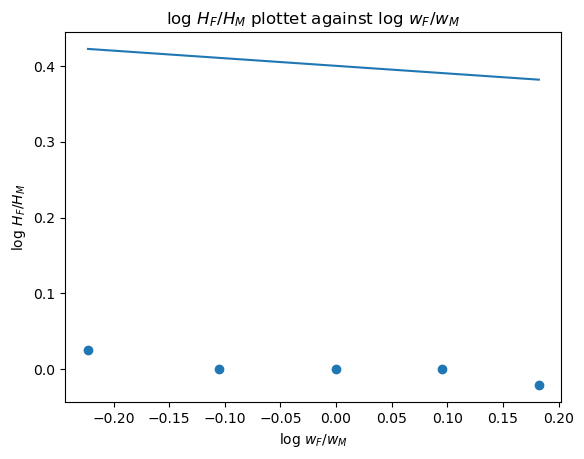

In [41]:
# a. create the figure
fig = plt.figure() 
#first we create a figure object by initializing the plt.figure

# b. plot
ax = fig.add_subplot(1,1,1) 
#we only add one subplot so the ax is basically the entire figure.

ax.plot(np.log(hsm.par.wF_vec),hsm.par.beta0_target+hsm.par.beta1_target*np.log(hsm.par.wF_vec))
ax.scatter(np.log(hsm.par.wF_vec),log_HF_HM_best) 


ax.set_title('log $H_F/H_M$ plottet against log $w_F/w_M$') #set title
ax.set_xlabel('log $w_F/w_M$') #set label for x-axis
ax.set_ylabel('log $H_F/H_M$'); #set label for y-axis

If alpha is assumed to be 0.5, then we assume that productivity for working at home is the same for both men and women. If that is not the case, which question 4 suggests, then this assumption will result in a poorer fit, because in question 4 we find that women are more productive than men, since alpha was 0.9.